### Code for reading the Equivalence Classes and storing them in a dictionary.

In [430]:
import sys
import re
import os
import pandas as pd
import csv
import numpy as np
import matplotlib as plt
from scipy import linalg 
import pickle
%matplotlib inline

eqClasses_dict = {}

def storeInDict(line, person):
    
    s= line.split()
    n=len(s)
    eqClassLength = int(s[0])
    tup = list()
    
    #Storing length 1 equivalence class as a string instead of a tuple in the dictionary
    if(eqClassLength == 1):
        t_name = s[1]
        if t_name not in eqClasses_dict:
            eqClasses_dict[t_name] = [0 for i in range(369)]
            eqClasses_dict[t_name][person] = int(s[n-1])
        else:
            eqClasses_dict[t_name][person] = int(s[n-1])

    else:
        #Create the tuple of transcript IDs which will be the key
        for i in range(1,eqClassLength+1):
            tup.append(s[i])
        tup = tuple(tup)

        if tup not in eqClasses_dict:
            eqClasses_dict[tup] = [0 for i in range(369)]
            eqClasses_dict[tup][person] = int(s[n-1])
        else:
            eqClasses_dict[tup][person] = int(s[n-1])


In [2]:
def parseInput(path, personCount):

    file = open(path,"r")

    lineCount = 0
    for line in file:
        if lineCount == 0:
            num_transcripts = int(line)
            lineCount+=1
            continue
        if lineCount == 1:
            num_eqClasses = int(line)
            lineCount+=1
            continue
        if lineCount < 2+ num_transcripts:
            lineCount+=1
            continue
        else:
            storeInDict(line, personCount)
            lineCount+=1
            continue


In [4]:
def parseAllFiles():
    
    traincsv = pd.read_csv("/Users/jatingarg/Desktop/CompBioData/project1/p1_train.csv",low_memory=False)
    accessionList = traincsv['accession'].values
    
    for i in range(len(accessionList)):
        name = accessionList[i]
        s="/Users/jatingarg/Desktop/CompBioData/project1/train/"+str(name)+"/bias/aux_info/eq_classes.txt"
        parseInput(s, i)

    print (len(eqClasses_dict))
    count =0
#     for key in eqClasses_dict.keys():
#         print (key)
#         print (eqClasses_dict[key])
#         count+=1
#         if count>20:
#             break


### Resultant vector showing the numReads in each equivalence class that has existed in any of the individuals

In [5]:
parseAllFiles()

1235738


In [6]:
df = pd.DataFrame.from_dict(eqClasses_dict)

### The dataframe showing the equivalence class name as columns and numReads in each equivalence class for every individual

In [7]:
df.head(10)

,61539,186119,16960,"(44665, 44668, 44669, 44672, 44674, 44678, 44680, 44681, 44683)","(82049, 82050, 82056, 82061, 82063, 82068, 82069, 82070, 82074)","(56737, 56738, 56739, 56740, 56743, 56744, 56745, 56746, 56749, 56751, 56752, 56754, 56755, 56757, 56759, 56760)",106069,"(127881, 127882, 127883, 127884, 127885)",156843,"(191532, 191533, 191534, 191535, 191537, 191538)",...,"(39639, 39640, 44721, 79517)","(165171, 166136)","(1501, 4045, 50960, 75802, 75803, 75806, 79178, 110698, 123461, 123832, 128244, 129055, 129284, 131828, 138901, 144453, 149193, 149197, 149765, 149766, 151313, 152018, 156317, 158365, 166801, 170646, 173148, 186464, 187632, 190852)","(9801, 43148, 43149, 43150, 120089, 129795)","(110263, 136032)",29140,"(105612, 198584)","(168761, 168762, 168763, 168764, 168765, 168766, 168767, 168770, 168771, 168776, 168777, 168778, 168779, 168780, 168782, 168783)","(2645, 2646, 2647, 12488, 154130, 181508, 190921, 190922, 193000)","(29950, 29951, 29953, 29954, 29955, 29956, 29957, 29958)"
0,1,8,2,1,6,1,2,16,3,228,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,3,0,9,43,1,229,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,5,0,6,28,5,256,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,2,0,5,36,1,322,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,5,11,1,336,...,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0,11,0,11,90,9,380,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,10,0,7,7,4,326,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,3,0,7,62,4,189,...,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,11,0,6,57,6,219,...,0,0,0,0,0,0,0,0,0,0
9,0,3,1,0,4,0,3,16,0,88,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df.to_csv("eq.csv",index=False)

In [8]:
colList = df.columns

In [9]:
df.shape

(369, 1235738)

In [10]:
readList = list()
for i in range(df.shape[1]):
    num = (df[colList[i]] != 0).sum()
    tup = tuple([num,i])
    readList.append(tup)

In [11]:
sortedList = list()
revSortedList = list()

In [12]:
sortedList = sorted(readList, key=lambda x:x[0])

In [13]:
revSortedList = sorted(readList, key=lambda x:x[0], reverse=True)

In [14]:
sortedList[10]

(1, 12874)

### Here we have sorted the the class according to whether the class is present in how many of the individuals

In [15]:
sortedNp = np.array(sortedList)

In [16]:
reverseSortedNp = np.array(revSortedList)

In [17]:
sortedNp.mean()

308982.72644767741

In [18]:
sortedDF = pd.DataFrame(sortedNp)

In [19]:
sortedDF.head(2)

,0,1
0,1,2708
1,1,3122


### Below result shows that there are some common Equivalence classes that are present in all 369 individuals and some are uniquely mapped to 1 person

In [20]:
sortedDF[1].describe()

count    1.235738e+06
mean     6.178685e+05
std      3.567270e+05
min      0.000000e+00
25%      3.089342e+05
50%      6.178685e+05
75%      9.268028e+05
max      1.235737e+06
Name: 1, dtype: float64

In [22]:
tempDF = sortedDF.copy()

In [24]:
tempDF = SVD(tempDF)

In [23]:
def SVD(tempDF):
    featureMatrix=np.array(tempDF)    

    U, s, Vh = linalg.svd( featureMatrix, full_matrices=1, compute_uv=1 )
    low_dim_p = 10000
    return U[:,0:low_dim_p]

In [412]:
sortedDF = tempDF[tempDF[0] >= 350]
sortedDF = sortedDF[sortedDF[0] <= 369]

In [413]:
sortedDF.shape

(160343, 2)

In [414]:
uniqueDF = sortedDF

In [415]:
uniqueDF.head(2)

,0,1
1075395,350,418
1075396,350,826


In [416]:
uniqueDF.shape

(160343, 2)

In [417]:
colIndex = uniqueDF[1].tolist()

In [418]:
colIndex[0]

418

In [419]:
colNames = list()

In [420]:
for i in range(len(colIndex)):
    colNames.append(colList[colIndex[i]])

In [421]:
dfTest1 = df.filter(colNames)

In [422]:
dfTest1 = dfTest1.head(369)
dfTest1.shape

(369, 160343)

### Here we have made a visual representation showing number of equivalence classes present on y-axis and the number of persons having those number of equivalence classes common to them.

#### So this shows more than .2 million equivalence classes are uniquely mapped to single persons while around 90K are common in all persons

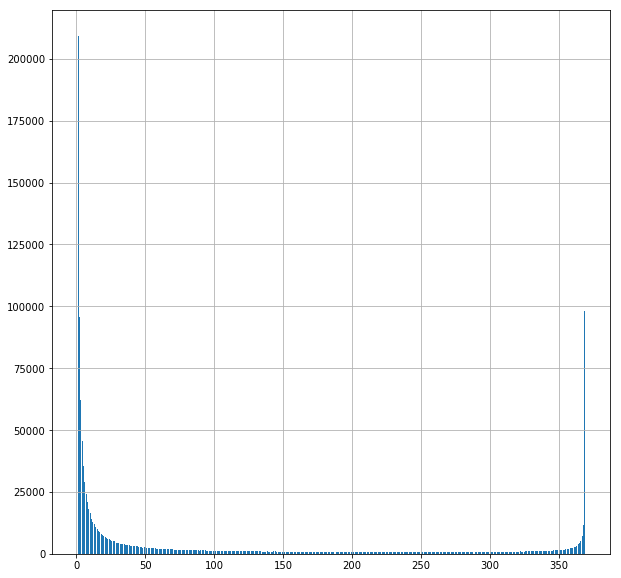

In [246]:
sortedDF[0].hist(figsize=(10,10),bins=500)

## Population Label Model

In [423]:
traincsv = pd.read_csv("/Users/jatingarg/Desktop/CompBioData/project1/p1_train_pop_lab.csv",low_memory=False)
accessionList = traincsv['accession'].values
countryList = traincsv['population'].values

In [424]:
traincsv.columns

Index(['accession', 'population', 'sequencing_center'], dtype='object')

In [425]:
len(countryList)

369

In [426]:
countryList[200]

'GBR'

In [427]:
dfTest1["Country"] = countryList

### So here we choose only those equivalence classes that are common in most of the persons to train our model that is Random Forest and we applied 5 fold Cross Validation

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [428]:
cross_val = 5
averageAccuracyScore = 0
f1pop = 0
rf_modelPop = RandomForestClassifier(n_estimators=100, # Number of trees
                                    max_features=dfTest1.shape[1]-10,    # Num features considered
                                    oob_score=False)    # Use OOB scoring*
for i in range(cross_val):
    msk = np.random.rand(len(dfTest1)) < 0.80

    train = dfTest1[msk]
    
    test = dfTest1[~msk]
    
    # Train the model
    rf_modelPop.fit(train.filter(dfTest1.columns[:-1]), train.filter(dfTest1.columns[-1:]))

    predictedDF = rf_modelPop.predict(test.filter(dfTest1.columns[:-1]))
    ansList = test['Country'].tolist()
    averageAccuracyScore += printAccuracy(ansList,predictedDF)
    f1pop += fScore(ansList,predictedDF)
    print(averageAccuracyScore)
print("F1-Score For Population label is : ",f1pop/float(cross_val))
print("Average Accuracy of model is " + str(averageAccuracyScore/cross_val))

/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.8552631578947368


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


1.7146381578947367


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


2.6529097628330085


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


3.537525147448393


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


4.381680991604237
F1-Score For Population label is :  0.876336198321
Average Accuracy of model is 0.8763361983208474


### The results shows the average accuracy for the test data set i.e around 84.5 %

In [377]:
predictedDF

array(['CEU', 'FIN', 'FIN', 'GBR', 'YRI', 'FIN', 'TSI', 'GBR', 'GBR',
       'GBR', 'CEU', 'YRI', 'GBR', 'CEU', 'YRI', 'TSI', 'GBR', 'GBR',
       'TSI', 'CEU', 'GBR', 'FIN', 'GBR', 'FIN', 'CEU', 'TSI', 'CEU',
       'GBR', 'TSI', 'FIN', 'TSI', 'GBR', 'YRI', 'TSI', 'GBR', 'GBR',
       'GBR', 'GBR', 'TSI', 'TSI', 'TSI', 'FIN', 'CEU', 'CEU', 'CEU',
       'TSI', 'FIN', 'TSI', 'FIN', 'CEU', 'CEU', 'TSI', 'TSI', 'FIN',
       'YRI', 'GBR', 'CEU', 'FIN', 'GBR', 'FIN', 'FIN', 'FIN', 'CEU',
       'CEU', 'CEU', 'YRI', 'FIN', 'GBR', 'CEU', 'GBR', 'YRI', 'FIN',
       'YRI', 'YRI', 'GBR', 'TSI', 'TSI', 'CEU', 'CEU'], dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics

### This shows the confusion matrix for the classes i.e number of classes(countries) predicted correctly/incorrectly
####                    [[ 7,  1,  0,  0,  2],
####                    [ 0, 12,  1,  4,  1],
####                    [ 0,  0,  9,  0,  0],
####                    [ 7,  0,  0,  9,  0],
####                    [ 0,  0,  0,  0, 12]])
#### Here we can see this model is not performing well specifically for the "TSI"

In [379]:
confusion_matrix(ansList,predictedDF,labels=['GBR','FIN','CEU','TSI','YRI'])

array([[13,  2,  0,  3,  0],
       [ 1,  9,  2,  2,  1],
       [ 0,  0, 15,  1,  0],
       [ 5,  4,  0, 10,  1],
       [ 1,  1,  1,  0,  7]])

In [403]:
def printAccuracy(ansList,predictedDF):
    count = 0
    for i in range(len(ansList)):
        if ansList[i] == predictedDF[i]:
            count += 1
    return (count/len(ansList))

## Sequencing Center Model

In [405]:
traincsv = pd.read_csv("/Users/jatingarg/Desktop/CompBioData/project1/p1_train_pop_lab.csv",low_memory=False)
accessionList = traincsv['accession'].values
sequencingCenterList = traincsv['sequencing_center'].values

In [406]:
traincsv.columns

Index(['accession', 'population', 'sequencing_center'], dtype='object')

In [407]:
dfTest1["SequencingCenter"] = sequencingCenterList

In [408]:
def fScore(y_true,y_pred):
    return sklearn.metrics.f1_score(y_true, y_pred,average='micro')

In [411]:
cross_val = 5
averageAccuracyScore = 0
f1Seq = 0
rf_modelSeq = RandomForestClassifier(n_estimators=100, # Number of trees
                                    max_features=dfTest1.shape[1]-10,    # Num features considered
                                    oob_score=False)    # Use OOB scoring*
for i in range(cross_val):
    msk = np.random.rand(len(dfTest1)) < 0.80

    train = dfTest1[msk]
    
    test = dfTest1[~msk]
    
    # Train the model
    rf_modelSeq.fit(train.filter(dfTest1.columns[:-1]), train.filter(dfTest1.columns[-1:]))

    predictedDF = rf_modelSeq.predict(test.filter(dfTest1.columns[:-1]))
    ansList = test['SequencingCenter'].tolist()
    averageAccuracyScore += printAccuracy(ansList,predictedDF)
    f1Seq += fScore(ansList,predictedDF)
    print(averageAccuracyScore)
print("F1-Score For Sequencing Center: ",f1Seq/float(cross_val))
print("Average Accuracy of model is " + str(averageAccuracyScore/cross_val))

/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.9210526315789473


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


1.8506300963676798


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


2.788901701305951


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


3.710776701305951


/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


4.64923823976749
F1-Score For Sequencing Center:  0.929847647953
Average Accuracy of model is 0.929847647953498


## Multi Target Model

In [382]:
traincsv = pd.read_csv("/Users/jatingarg/Desktop/CompBioData/project1/p1_train_pop_lab.csv",low_memory=False)
accessionList = traincsv['accession'].values
sequencingCenterList = np.array(traincsv['sequencing_center'].values)
sequencingCenterList = sequencingCenterList.astype(str)
countryList = traincsv['population'].values

In [383]:
dfTest1["SequencingCenter"] = sequencingCenterList

In [384]:
dfTest1["Population"] = countryList

In [385]:
dfTest1.head(2)

,"(108499, 108500, 108503, 108505, 108506, 108508, 108509, 108510, 108511, 108515, 108516)","(33496, 33499, 33503, 33504, 33505)",164514,"(181357, 181358)","(62067, 191737, 191738, 191748, 191751, 191754, 191755)","(54562, 54563, 54564, 54565, 54566, 54568, 54569, 54570, 54571)","(84115, 84117, 84118, 84119, 84122)","(112842, 112843)",92040,"(35305, 35306)",...,"(141520, 141521, 141533, 141541, 141542, 141544, 141545)","(86016, 86017, 86020, 86021, 86027, 86028)","(68163, 68164, 68165, 68167, 68168, 68169, 68170, 68173, 68174, 68177, 68182, 68183, 147290)","(33495, 33496, 33497, 33498, 33499, 33500, 33501, 33502, 33503, 33504, 33505, 33506, 33507, 33508)","(50869, 50870, 50873, 50874)","(114888, 114894, 114896, 114897, 114898, 114901, 114902, 114906)","(42713, 42715, 42718, 42719, 42721)",146444,SequencingCenter,Population
0,1,3,1,4,3,2,1,1,4,2,...,3,19,9,5,52,482,3,2,3,CEU
1,0,2,7,0,5,8,8,7,7,4,...,13,35,36,14,90,411,2,23,4,FIN


In [386]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [391]:
cross_val = 5
averageAccuracyScore = 0
f1Pop,f1Seq = 0,0
rf_model_M = RandomForestClassifier(n_estimators=100, # Number of trees
                                  max_features=dfTest1.shape[1]-10,
                                    oob_score=False)    # Use OOB scoring*
# rf_model = LogisticRegression(penalty='l2')
multi_target_forest = MultiOutputClassifier(rf_model_M, n_jobs=-1)
for i in range(cross_val):
    msk = np.random.rand(len(dfTest1)) < 0.80

    train = dfTest1[msk]
    
    test = dfTest1[~msk]

    trainList = dfTest1.columns
    trainList = trainList[0:-1]

    features = trainList
    
    # Train the model
    multi_target_forest.fit(train.filter(dfTest1.columns[:-2]), train.filter(dfTest1.columns[-2:]))

    predictedDF = multi_target_forest.predict(test.filter(dfTest1.columns[:-2]))
    ansListSeq = test['SequencingCenter'].tolist()
    ansListPop = test['Population'].tolist()

    averageAccuracyScore += printAccuracy(ansListSeq,ansListPop,predictedDF)
    f1Pop += fScoreMulti(ansListPop,predictedDF[:,1:2].flatten())
    f1Seq += fScoreMulti(ansListSeq,predictedDF[:,0:1].flatten())

    print(averageAccuracyScore)
print("F1-Score For Population: ",f1Pop/float(cross_val))
print("F1-Score For Sequencing Center: ",f1Seq/float(cross_val))
print("Average Accuracy of model is " + str(averageAccuracyScore/cross_val))

0.8571428571428571
1.7049689440993787
2.4255571793934965
3.2450016238379407
4.030715909552226
F1-Score For Population:  0.843919132871
F1-Score For Sequencing Center:  0.952077553024
Average Accuracy of model is 0.8061431819104452


In [388]:
def printAccuracy(ansListSeq,ansListPop,predictedDF):
    count = 0
    for i in range(len(ansListSeq)):
        if ansListSeq[i] == predictedDF[i][0] and ansListPop[i] == predictedDF[i][1]:
            count += 1
#     print(countSeq/len(ansListSeq),countPop/len(ansListSeq))
    return count/float(len(ansListSeq))

In [389]:
def fScoreMulti(y_true,y_pred):
    return sklearn.metrics.f1_score(y_true, y_pred,average='micro')

In [432]:
# save the model to disk as pickle files
filename = '/Users/jatingarg/Desktop/CompBioData/project1/multi_target_forest.pickle'
pickle.dump(multi_target_forest, open(filename, 'wb'))

In [433]:
filename = '/Users/jatingarg/Desktop/CompBioData/project1/rf_modelSeq.pickle'
pickle.dump(rf_modelSeq, open(filename, 'wb'))

In [434]:
filename = '/Users/jatingarg/Desktop/CompBioData/project1/rf_modelPop.pickle'
pickle.dump(rf_modelPop, open(filename, 'wb'))

### Finish